In [1]:
import pandas as pd
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt

In [2]:
files = [ 'data/Molti_Output/'+str(i).replace('.0','')+'.csv' for i in np.arange(0.5, 30.5, 0.5).tolist() ]

lst = []
for file in files:
    num_comm = 0
    d = defaultdict(list)
    with open(file, 'r') as f:
        for line in f:
            if line.startswith('#') or line.startswith('\n'):
                continue
            if line.startswith('ClusterID'):
                comm = line
                d[comm] = []
                num_comm += 1
            else:
                d[comm].append(line.strip())

    mu_comm = np.mean([ len(v) for k,v in d.items() ])
    lst.append([num_comm, mu_comm])

df = pd.DataFrame.from_records(lst)
df.columns = ['num_comm','mu_comm']

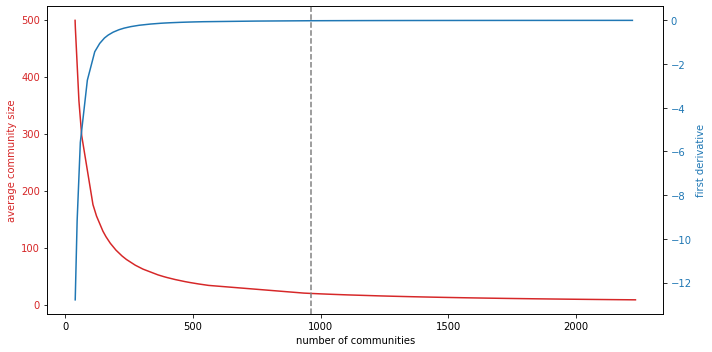

gamma = data/Molti_Output/12.csv


In [7]:
plt.rcParams['figure.figsize'] = [10, 5]

x = np.array(df['num_comm'].tolist())
y = np.array(df['mu_comm'].tolist())

# first order derivative of y and correponsing x values
dy=np.diff(y,1)
dx=np.diff(x,1)
yfirst=dy/dx
xfirst=0.5*(x[:-1]+x[1:])

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('number of communities')
ax1.set_ylabel('average community size', color=color)
ax1.plot(x, y, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('first derivative', color=color)  # we already handled the x-label with ax1
ax2.plot(xfirst, yfirst, color=color)
ax2.tick_params(axis='y', labelcolor=color)

#the plateau is eastablished right after the first derivative reaches zero (+/- 0.05)
num_comm, gamma = [[x[i+2],files[i+2]] for i,a in enumerate(yfirst) if (abs(a)<0.05) & (i+2)][0]
plt.axvline(x=num_comm, color='grey', linestyle='--')

fig.tight_layout()
plt.show()

print('gamma =',gamma)